In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
%matplotlib inline

In [3]:
data= pd.read_csv('price.csv')
data

,Area,Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


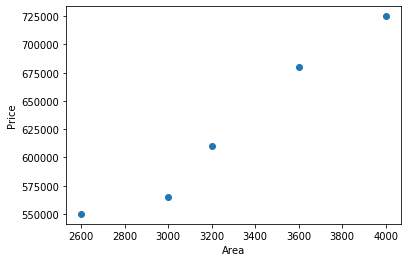

In [4]:
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(data.Area, data.Price)

In [5]:
price= data.Price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: Price, dtype: int64

In [6]:
new_data= data.drop('Price', axis='columns')
new_data

,Area
0,2600
1,3000
2,3200
3,3600
4,4000


In [7]:
#Regression line
reg= linear_model.LinearRegression()
reg.fit(new_data, price)

LinearRegression()

In [8]:
#Predicting area of 3000 sq.ft.
reg.predict([[3000]])

array([587979.45205479])

In [9]:
#Accuracy
r2_score= reg.score(new_data, price)
print(r2_score)

0.9584301138199486


## Generate csv file with sq ft

In [10]:
area_df = pd.read_csv("area.csv")
area_df.head(3)

,Area
0,4100
1,4200
2,4300


In [12]:
p = reg.predict(area_df)
p

array([737345.89041096, 750924.65753425, 764503.42465753, 778082.19178082,
       791660.95890411, 805239.7260274 , 818818.49315068, 832397.26027397,
       845976.02739726, 859554.79452055])

In [13]:
area_df['Prices'] = p
area_df

,Area,Prices
0,4100,737345.890411
1,4200,750924.657534
2,4300,764503.424658
3,4400,778082.191781
4,4500,791660.958904
5,4600,805239.726027
6,4700,818818.493151
7,4800,832397.260274
8,4900,845976.027397
9,5000,859554.794521


In [15]:
area_df.to_csv("prediction.csv", index=False)